# Makine Öğrenmesi

## 1. Doğrusal Regresyon
Doğrusal regresyon analizi, bir değişkenin değerini başka bir değişkenin değerine göre tahmin etmek için kullanılır. Tahmin etmek istediğiniz değişken, bağımlı değişken olarak adlandırılır. Diğer değişkenin değerini tahmin etmek için kullandığınız değişken ise bağımsız değişken olarak adlandırılır.

Bu analiz biçimi, bağımlı değişkenin değerini en iyi öngören bir ya da daha fazla bağımsız değişkeni kullanarak doğrusal denklemin katsayılarını tahmin eder. Doğrusal regresyon, öngörülen ve gerçek çıkış değerleri arasındaki uyumsuzlukları en aza indiren düz bir çizgi ya da yüzeye yerleşir. Bir çift eşleştirilmiş veri kümesi için en uygun satırı keşfetmek üzere "en küçük kareler" yöntemini kullanan basit doğrusal regresyon hesaplayıcılar vardır. Daha sonra, Y'den (bağımlı değişken) X'in (bağımsız değişken) değerini tahmin edersiniz.

Bu başlıkta incelenecek Doğrusal Regresyon yöntemleri:

    Basit Doğrusal Regresyon
    Çoklu Doğrusal Regresyon
    Temel Bileşen Regresyonu
    Kısmi En Küçük Kareler Regresyonu
    Ridge Regresyon
    Lasso Regresyon
    Elastik Net Regresyon

### 1.1. Basit Doğrusal Regresyon
Temel amaç, bağımlı ve bağımsız değişken arasındaki ilişkiyi ifade eden doğrusal fonksiyonu bulmaktır.

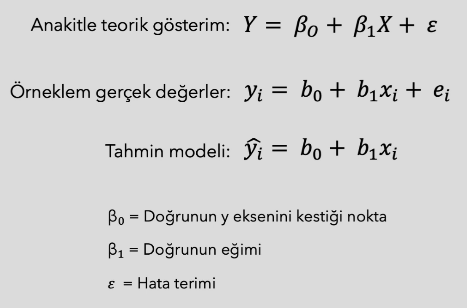

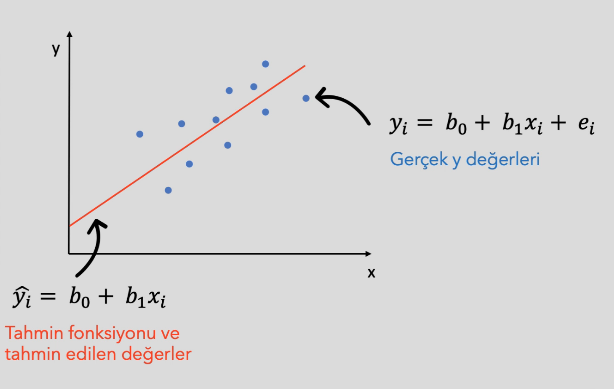

#### 1.1.1. Modelleme
Advertising veriseti

https://github.com/justmarkham/scikit-learn-videos/blob/master/data/Advertising.csv

In [3]:
import pandas as pd
ad = pd.read_csv("data/Advertising.csv")
df = ad.copy()
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
#usecols kullanılarak hangi kolonları kullanacagini belirtebiliriz
import pandas as pd
ad = pd.read_csv("data/Advertising.csv", usecols = [1,2,3,4]) 
df = ad.copy()
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [7]:
df.isnull().values.any()

False

In [9]:
df.corr()
#bagimsiz degiskenlerin (tv, radio, newspaper) bagimli degisken (sales) uzerindeki etkisine dikkat

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


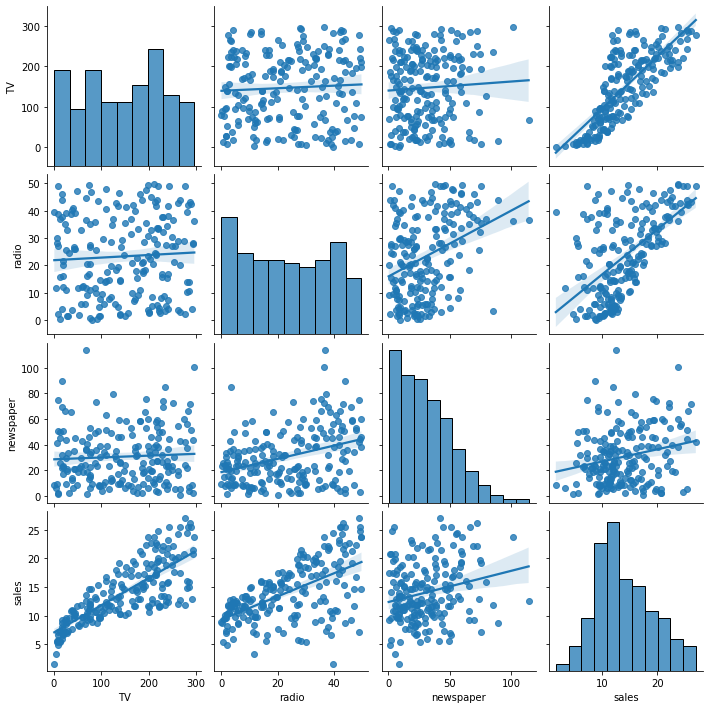

In [10]:
import seaborn as sns
sns.pairplot(df, kind  ="reg");

Üstteki grafikte;

    - dağılım grafikleri incelendiğinde newspaper dağılımının garipliği göze çarpıyor.
    - tv reklamlarının satışa olan etkisini, korelasyon eğrisinin eğimini görebiliyoruz. 
    - radio reklamlarının satışa olan etkisini, korelasyon eğrisinin eğimini görebiliyoruz. 
    - gazete reklamlarının satışa olan etkisinin azlığını, korelasyon eğrisinin eğiminin az olduğunu görebiliyoruz. 
    - tv ve radio arasındaki korelasyonun azlığı da satışlardaki varyasyonu açıklama noktasında tv gibi radio değişkenini de modelleme işleminde kullanabileceğimiz anlamına gelmektedir.

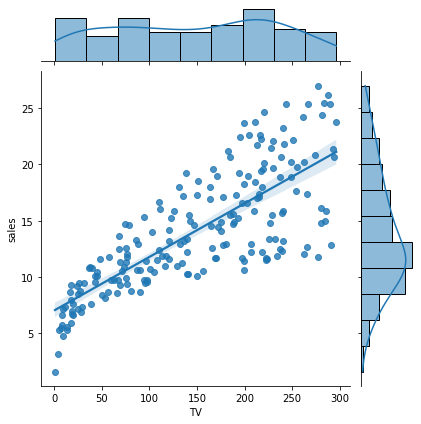

In [11]:
sns.jointplot(x = "TV", y = "sales", data = df, kind = "reg")

**Statsmodels ile modelleme**

In [38]:
import statsmodels.api as sm
X = df[["TV"]]
X[0:5]

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [20]:
from warnings import filterwarnings
filterwarnings('ignore')
#uyarıları kapatmak icin

In [40]:
#elinizde tek degiskenli bir matris var ve regresyon problemini cozmek icin, matris islemlerinin yapilabilmesi icin
#matrise sabit 1 ifadesi eklememiz gerekiyor (beta0 için kullanacagiz).
X = sm.add_constant(data=X)
X[0:5]

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [41]:
#bağımlı değişkenimizi de alıyoruz
y = df["sales"]
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [42]:
#modelin kurulması
lm = sm.OLS(y,X)
#modelin fit edilmesi
model = lm.fit()
#model ciktilarinin alinmasi
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 04 May 2022   Prob (F-statistic):           1.47e-42
Time:                        23:39:15   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**R-squared**:	Bağımsız değişkenin, bağımlı değişkendeki değişkenliği açıklama başarısı. Bu örnek için TV değişkeni satışlardaki değişkenliğin %61'ini açıklayabilmektedir.

**Adj. R-squared**: R'karenin her parametre eklendiğinde artmasına olan duyarlılığının törpülenmiş halidir.

**F-statistic**: Modelin anlamlılığının ifade edilmesi için kullanılan bir test istatistiğidir.

**Prob (F-statistic)**: F istatistiğinin p-value değeridir.

**const**: coef'le kesiştiği noktada beta0 değerini ifade etmektedir. Diğer değişkenlerde herhangi bir değişiklik olmadığında y'nin beklenen değerini ifade eder. beta0 eğrinin y eksenini kestiği noktayı ifade ediyordu. 

**TV**: coef'le kesiştiği noktada beta1 katsayısını ifade etmektedir. aynı zamanda tabloda standart sapması, t istatistiği için p-value değeri verilmiş ki bu örnek için 0.05'ten küçktür ve katsayıların anlamlı olduğu anlamına gelir. aynı zamanda tablonun devamında güven aralıkları da verilmiş. Gene coef'le kesiştiği noktadan şu yorum da çıkartılabilir: TV harcamaarında 1 birimlik bir harcama olduğunda satışlarda 0.047 kadar ortalama bir artış olması beklenir.

In [43]:
#sadece katsayıları görelim 
model.params

const    7.032594
TV       0.047537
dtype: float64

In [44]:
#katsayı detaylarını görelim
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [45]:
#katsayıların güven aralıkları
model.conf_int()

,0,1
const,6.129719,7.935468
TV,0.042231,0.052843


In [46]:
#modelin anlamlılığına dair p-value değerini görelim
model.f_pvalue

1.467389700194647e-42

In [47]:
print("f_pvalue: ", "%.4f" % model.f_pvalue)

f_pvalue:  0.0000


In [49]:
#f istatistiği
print("fvalue: ", "%.2f" % model.fvalue)

fvalue:  312.14


In [51]:
#modelin hata kareler ortalaması
#ortalaması 14 olan satış değişkeni için mse çok yüksek çıkmış. kabul edilebilir bir değer değildir.
model.mse_model

3314.618166868649

In [53]:
#düzeltilmiş rkare değeri
model.rsquared_adj

0.6099148238341623

In [54]:
#modelden tahmin edilen y değerleri
model.fittedvalues[0:5]

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [55]:
#gercek y degerleri
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [56]:
#model denklemi
print("Sales = " +  str("%.2f" % model.params[0]) + " + TV" + "*" + str("%.2f" % model.params[1]))

Sales = 7.03 + TV*0.05


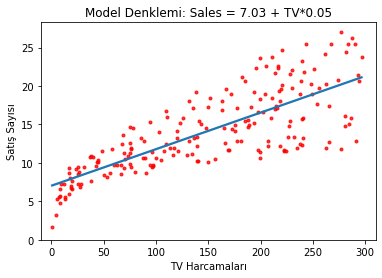

In [57]:
#modelin görsel olarak ifade edilmesi
g = sns.regplot(df["TV"], df["sales"], ci=None, scatter_kws={'color':'r', 's':9})
g.set_title("Model Denklemi: Sales = 7.03 + TV*0.05")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
import matplotlib.pyplot as plt
plt.xlim(-10,310)
plt.ylim(bottom=0);

**sklearn ile modelleme**

In [60]:
#aynı işlemin sklearn kutuphanesi ile yapılması
from sklearn.linear_model import LinearRegression

X = df[["TV"]]
y = df["sales"]
reg = LinearRegression()
model = reg.fit(X, y)
print(model.intercept_)
print(model.coef_)

7.0325935491276965
[0.04753664]


In [61]:
model.score(X,y)

0.611875050850071

In [62]:
model.predict(X)[0:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

In [63]:
y[0:10]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
5     7.2
6    11.8
7    13.2
8     4.8
9    10.6
Name: sales, dtype: float64

#### 1.1.2. Tahmin

Model denklemi:

Sales = 7.03 + TV*0.04

Örneğin 30 birim TV harcaması olduğunda satışların tahmini değeri ne olur?

In [64]:
7.03 + 30*0.04

8.23

In [67]:
from sklearn.linear_model import LinearRegression
X = df[["TV"]]
y = df["sales"]
reg = LinearRegression()
model = reg.fit(X, y)
model.predict([[30]])
#usttekinden farklı olma sebebi virgülden sonraki yuvarlama işlemimizden kaynaklanıyor

array([8.45869276])

In [69]:
#çoklu tahmin işlemi
yeni_veri = [[5],[90],[200]]
model.predict(yeni_veri)

array([ 7.27027675, 11.31089119, 16.53992164])

**Artıklar ve Makine Öğrenmesindeki Önemi**

In [70]:
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.formula.api as smf
lm = smf.ols("sales ~ TV", df)
model = lm.fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 05 May 2022   Prob (F-statistic):           1.47e-42
Time:                        00:03:40   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
mse = mean_squared_error(y, model.fittedvalues)
#gerçek değerler ile tahmin edilen değerler arasındaki farkların karelerinin ortalaması
mse

10.512652915656759

In [75]:
import numpy as np
rmse = np.sqrt(mse)
rmse

3.2423221486546887

In [76]:
model.predict(X)[0:10]

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
5     7.446162
6     9.765950
7    12.746498
8     7.441409
9    16.530414
dtype: float64

In [77]:
y[0:10]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
5     7.2
6    11.8
7    13.2
8     4.8
9    10.6
Name: sales, dtype: float64

In [78]:
#karşılaştırma tablosu
k_t = pd.DataFrame({"gercek_y": y[0:10],
                   "tahmin_y": model.predict(X)[0:10]})
k_t

,gercek_y,tahmin_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [80]:
k_t["hata"] = k_t["gercek_y"] - k_t["tahmin_y"]
k_t

,gercek_y,tahmin_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [81]:
k_t["hata_kare"] = k_t["hata"]**2
k_t

,gercek_y,tahmin_y,hata,hata_kare
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [86]:
#toplam hata
np.sum(k_t["hata_kare"])

92.90350329638102

In [87]:
#hata kareler ortalaması
np.mean(k_t["hata_kare"])

9.290350329638104

In [88]:
#hata kareler ortalamasının karekoku
np.sqrt(np.mean(k_t["hata_kare"]))

3.0480075999967755

burada elde edilen hata katsayıları kullanılarak sonraki modellerin parametre optimizasyonları yapılır.

In [89]:
#her bir tahmin için artıklar (hatalar)
model.resid[0:10]

0    4.129225
1    1.252026
2    1.449776
3    4.265605
4   -2.727218
5   -0.246162
6    2.034050
7    0.453502
8   -2.641409
9   -5.930414
dtype: float64

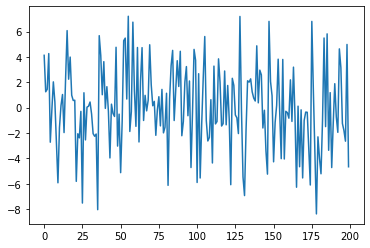

In [91]:
#artıkların görselleştirilmesi
#bu hatalar verisetindeki aykırı değerlerden mi kaynaklanıyor gibi soruların sorulabileceği 
#ve bu sorulara yanıt aramaya bizi sevk edecek gözlemler
plt.plot(model.resid)

### 1.2. Çoklu Doğrusal Regresyon

Temel amaç, bağımlı ve bağımsız değişken**ler** arasındaki ilişkiyi ifade eden doğrusal fonksiyonu bulmaktır. Bağımlı değişkeni etkilediği düşünülen bağımsız değişkenlerden hangisinin ya da hangilerinin bağımlı değişkeni ne yönde ne şekilde etkilediğini tespit edebilmek için kullanılabilir.

**Verisetinin Eğitim ve Test Verisetlerine Bölünmesi**

In [3]:
import pandas as pd
ad = pd.read_csv("data/Advertising.csv", usecols = [1,2,3,4])
df = ad.copy()
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'data/Advertising.csv'

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X = df.drop("sales", axis = 1)
y = df["sales"]
#randomstate her üretme işleminde farklı değerler çıkmasını istemedigimizden rastgele bir değer veriyoruz
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

NameError: name 'df' is not defined

In [99]:
#verisetinin bütününün kopyası
training = df.copy()
training.shape

(200, 4)

#### 1.2.1. Model

**Statsmodels ile modelleme**

Yorumlama yapmak gibi bir niyetimiz var ise statsmdels kullanmak daha avantajlı olacaktır.

In [113]:
import statsmodels.api as sm
lm = sm.OLS(y_train, X_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              2935.
Date:                Thu, 05 May 2022   Prob (F-statistic):                   1.28e-137
Time:                        01:41:26   Log-Likelihood:                         -336.65
No. Observations:                 160   AIC:                                      679.3
Df Residuals:                     157   BIC:                                      688.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0531      0.001     36.467      0.000       0.050       0.056
radio          0.2188      0.011     20.138      0.000       0.197       0.240
newspaper      0.0239      0.008      3.011      0.003       0.008       0.040
==============================================================================
Omnibus:                       11.405   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               15.574
Skew:                          -0.432   Prob(JB):                     0.000415
Kurtosis:                       4.261   Cond. No.                         13.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Rkare değerinin arttığı gözlemleniyor. artık bu verisetinde satış değişkeninin değişkenliğinin %98'ini açıklayabiliyoruz. p-value değeri oldukça düşük. katsayılardaki p-value değerlerine bakıldığında tüm değişkenlerin de anlamlı olduğu gözlemlenmekte.

**scikit-learn ile modelleme**

Diğer makine öğrenmesi algoritmalarıyla uyumlu ancak yorumlama konusunda statsmodels kadar becerikli değildir.

In [102]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(X_train, y_train)
#sabit katsayı
print(model.intercept_)
#bağımsız deşişken katsayıları 
print(model.coef_)

2.979067338122629
[0.04472952 0.18919505 0.00276111]


#### 1.2.2. Tahmin

Model denklemi:

Sales = 2.97 + TV0.04 + radio0.18 + newspaper*0.002

Örneğin 30 birim TV harcaması, 10 birim radio harcamasi, 40 birimde gazete harcaması olduğunda satışların tahmini değeri ne olur?


In [104]:
yeni_veri = [[30], [10],[40]]
yeni_veri = pd.DataFrame(yeni_veri).T
yeni_veri

,0,1,2
0,30,10,40


In [105]:
model.predict(yeni_veri)

array([6.32334798])

In [110]:
from sklearn.metrics import mean_squared_error
#eğitim hatası
rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
rmse

1.644727765644337

In [111]:
#test hatası
rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
rmse

1.7815996615334508

#### 1.2.3. Model Tuning / Model Doğrulama

In [112]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [126]:

X = df.drop('sales', axis=1)
y = df["sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=90)
lm = LinearRegression() 
model = lm.fit(X_train, y_train)

In [133]:
rmseTrain=np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
print(rmseTrain)
rmseTest=np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
print(rmseTest)
model.score(X_train, y_train)

1.6966492467563243
1.5685753810468912


0.9031056838494878

**Not:** test ve train için eleman seçerken rastgelelilik kullanıyoruz ancak bu durum test skorlarımızı etkileyecektir. bunun için de cross validation (çapraz doğrulama) yöntemini kullanabiliriz. aşağıda 10 çevrimlik bir cross validation gerçekleştirilip ortalamaları alınarak daha güvenilir bir hata bilgisine sahip olabiliriz.

In [132]:
#eğitim verileri için çapraz doğrulama ile elde edilmiş ortalama r2 skoru
cross_val_score(model, X_train, y_train, cv = 10, scoring = "r2").mean()

0.8752904720396149

In [134]:
#neg_mean_squared_error'da sonuc negatif olacağı için üstte (-) ile çarpıyoruz 
rmseTrain=np.sqrt(-cross_val_score(model, 
                X_train, 
                y_train, 
                cv = 10, 
                scoring = "neg_mean_squared_error")).mean()
print(rmseTrain)
rmseTest=np.sqrt(-cross_val_score(model, 
                X_test, 
                y_test, 
                cv = 10, 
                scoring = "neg_mean_squared_error")).mean()
print(rmseTest)

1.7078729150870635
1.5381406635157713


### 1.3. PCR (Temel Bileşen Regresyonu - Principal Component Regression)
Değişkenlere boyut indirgeme uygulandıktan sonra çıkan bileşenlere regresyon modeli kurulması fikrine dayanır.

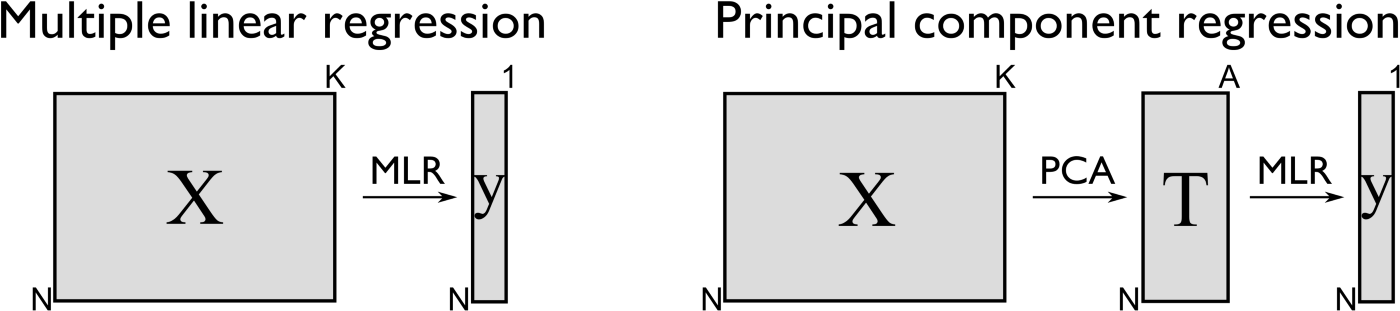

Veriseti hitters.csv

https://gist.github.com/keeganhines/59974f1ebef97bbaa44fb19143f90bad

#### 1.3.1. Model

In [136]:
import pandas as pd
import numpy as np
hit = pd.read_csv("data/Hitters.csv")
df = hit.copy()
df = df.dropna()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64

In [138]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,263.0,403.642586,147.307209,19.0,282.5,413.0,526.0,687.0
Hits,263.0,107.828897,45.125326,1.0,71.5,103.0,141.5,238.0
HmRun,263.0,11.619772,8.757108,0.0,5.0,9.0,18.0,40.0
Runs,263.0,54.745247,25.539816,0.0,33.5,52.0,73.0,130.0
RBI,263.0,51.486692,25.882714,0.0,30.0,47.0,71.0,121.0
Walks,263.0,41.114068,21.718056,0.0,23.0,37.0,57.0,105.0
Years,263.0,7.311787,4.793616,1.0,4.0,6.0,10.0,24.0
CAtBat,263.0,2657.543726,2286.582929,19.0,842.5,1931.0,3890.5,14053.0
CHits,263.0,722.186312,648.199644,4.0,212.0,516.0,1054.0,4256.0
CHmRun,263.0,69.239544,82.197581,0.0,15.0,40.0,92.5,548.0


In [139]:
#kategorik değişkenlerin dummy değişkene dönüştürülmesi
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
dms.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [140]:
y = df["Salary"]

In [142]:
X_ = df.drop(["Salary","League","Division","NewLeague"], axis = 1).astype("float64")
X_.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0


In [143]:
#dummy degisken tuzagindan kurtariyoruz
X = pd.concat([X_, dms[["League_N", "Division_W","NewLeague_N"]]], axis = 1)
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

print("X_train", X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)
training = df.copy()
print("training", training.shape)

X_train (197, 19)
y_train (197,)
X_test (66, 19)
y_test (66,)
training (263, 20)


In [200]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
pca = PCA()
#indirgenmiş veriseti (transform indirgeme islemi)(scale islemi veri standardizasyonu yapmayi saglar)

X_reduced_train = pca.fit_transform(scale(X_train))
#ilk gözlemin tüm bileşenlerde incelenmesi
X_reduced_train[0:1,:]
#Normalde PCA n_components yani bileşen sayısı parametresini alır. Eğer parametreyi vermezsek bütün bileşenleri kullanır.

array([[-2.49569913e+00, -3.37762397e-01,  7.06391950e-01,
        -1.32791025e+00, -8.21824333e-01, -6.62790677e-01,
        -6.56764789e-01,  3.68093279e-02, -2.03665105e-01,
         1.76134815e-01, -9.20131987e-02,  2.40129020e-01,
        -3.60473661e-03, -3.41246327e-02,  4.32799605e-02,
         1.02996923e-01,  3.70733348e-03,  1.37933445e-03,
        -6.63814471e-03]])

In [201]:
#açıklanan varyans oranı
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)
#1. bilesen verisetindeki varyansın %38ini ifade ettiğini belirtir.
#2. bileşenin kendinden önceki bileşenle birlikte verisetindeki varyansın %59unu ifade ettiğini belirtir.
#3. bileşenin kendinden önceki bileşenlerle birlikte verisetindeki varyansın %70unu ifade ettiğini belirtir.
#...

#burada 10 bileşenle verisetindeki varyansın %97'sini ifade edebiliyoruz.

array([38.18, 59.88, 70.88, 78.88, 84.18, 88.45, 92.05, 94.86, 96.34,
       97.28, 98.01, 98.68, 99.18, 99.49, 99.74, 99.9 , 99.96, 99.98,
       99.99])

In [202]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train, y_train)
print(pcr_model.intercept_)
print(pcr_model.coef_)

543.4834416243655
[ 111.13977427  -29.34209502   26.29799759  -38.47549852  -56.9200785
   54.44779423   40.77493384  -23.72746012    9.31198164   13.02031672
   45.58357748   31.97791627   18.93930958 -115.60940171   24.00382778
  415.70806202 -449.51779543  563.07375399  302.53718462]


#### 1.3.2. Tahmin

In [203]:
y_pred = pcr_model.predict(X_reduced_train)
y_pred[0:5]

array([377.44484744, 802.19452124, 495.60987745, 112.53177731,
       426.21613066])

In [204]:
from sklearn.metrics import mean_squared_error, r2_score
np.sqrt(mean_squared_error(y_train, y_pred))

289.3292825564976

In [205]:
df["Salary"].mean()

535.9258821292775

In [206]:
r2_score(y_train, y_pred)

0.5770075250410178

In [207]:
pca2 = PCA()
X_reduced_test = pca2.fit_transform(scale(X_test))
y_pred = pcr_model.predict(X_reduced_test)
np.sqrt(mean_squared_error(y_test, y_pred))

405.15753641499634

#### 1.3.3. Model Tuning

In [211]:
lm = LinearRegression()
#tüm bileşenlerle ile deneyelim
pcr_model = lm.fit(X_reduced_train, y_train)
y_pred = pcr_model.predict(X_reduced_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))

405.15753641499634


In [220]:
lm = LinearRegression()
#15 bileşenle ile bir deneyelim
pcr_model = lm.fit(X_reduced_train[:,0:15], y_train)
y_pred = pcr_model.predict(X_reduced_test[:,0:15])
print(np.sqrt(mean_squared_error(y_test, y_pred)))

401.31830788643987


In [213]:
#cross validation sayesinde olası bileşen sayılarıni gonderip optimum bileşen sayısını belirleyebiliriz 
from sklearn import model_selection
cv_10 = model_selection.KFold(n_splits = 10,
                             shuffle = True,
                             random_state = 1)
lm = LinearRegression()
RMSE = []


for i in np.arange(1, X_reduced_train.shape[1] + 1):
    
    score = np.sqrt(-1*model_selection.cross_val_score(lm, 
                                                       X_reduced_train[:,:i], 
                                                       y_train.ravel(), 
                                                       cv=cv_10, 
                                                       scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

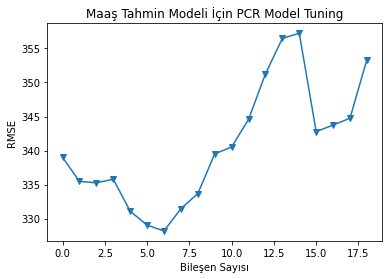

In [214]:
import matplotlib.pyplot as plt
plt.plot(RMSE, '-v')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Maaş Tahmin Modeli İçin PCR Model Tuning');

Grafikten de anlaşılacağı üzere bileşen sayısını 6 seçmek en düşük hataya erişmemizi sağlayacaktır.

In [217]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:6], y_train)
y_pred = pcr_model.predict(X_reduced_train[:,0:6])
print(np.sqrt(mean_squared_error(y_train, y_pred)))
y_pred = pcr_model.predict(X_reduced_test[:,0:6])
print(np.sqrt(mean_squared_error(y_test, y_pred)))

308.8265983094501
393.1198700096223


### 1.4. PLS (Kısmi En Küçük Kareler Regresyonu)
Değişkenlerin daha az sayıda ve aralarında çoklu doğrusal bağlantı problemi olmayan bileşenlere indirgenip regresyon modeli kurulması fikrine dayanır.

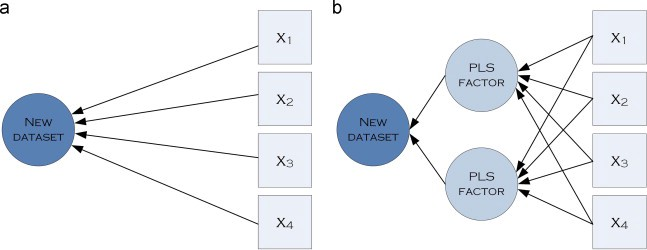

PCR'da doğrusal kombinasyonlar yani bileşenler bağımsız değişken uzağındaki değişkenliği maksimum şekilde özetleyecek şekilde oluşturulur. bu durum bağımlı değişkeni açıklama yeteneği olmamasına sebep olmaktadır.

PLS'de ise bileşenler bağımlı değişken ile olan kovaryansı maksimum şekilde özetleyecek şekilde oluşturulur.

Değişkenler atılmak istenmiyorsa ve açıklanabilirlik isteniyorsa PLS kullanılmalıdır.

PLS, gözetimli boyut indirgeme prosedürü, PCR gözetimsiz boyut indirgeme prosedürü olarak görülebilir.

#### 1.4.1. Model

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
hit = pd.read_csv("data/Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, ms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [254]:
from sklearn.cross_decomposition import PLSRegression, PLSSVD
#tum bilesenler alindi
pls_model = PLSRegression().fit(X_train, y_train)
#3 bilesene indirgeyebiliriz ancak bu ara katmandaki PLS factor sayisini belirler, degisken sayisi gene aynidir.
#pls_model = PLSRegression(n_components=3).fit(X_train, y_train)
pls_model.coef_

array([[ 35.32916493],
       [ 48.83425857],
       [ 18.50240933],
       [ 39.28117603],
       [ 30.59952998],
       [ 40.03398345],
       [ 16.85990516],
       [ 28.22289896],
       [ 32.73784993],
       [ 22.00875744],
       [ 33.60903032],
       [ 30.39402522],
       [ 25.73279799],
       [ 54.98835148],
       [  6.56590871],
       [ -0.90894359],
       [ 17.60903423],
       [-37.24246339],
       [ 14.69680385]])

#### 1.4.2. Tahmin

In [242]:
X_train.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
183,328.0,91.0,12.0,51.0,43.0,33.0,2.0,342.0,94.0,12.0,51.0,44.0,33.0,145.0,59.0,8.0,1,0,1
229,514.0,144.0,0.0,67.0,54.0,79.0,9.0,4739.0,1169.0,13.0,583.0,374.0,528.0,229.0,453.0,15.0,1,0,1
286,593.0,152.0,23.0,69.0,75.0,53.0,6.0,2765.0,686.0,133.0,369.0,384.0,321.0,315.0,10.0,6.0,0,1,0
102,233.0,49.0,2.0,41.0,23.0,18.0,8.0,1350.0,336.0,7.0,166.0,122.0,106.0,102.0,132.0,10.0,0,0,0
153,341.0,95.0,6.0,48.0,42.0,20.0,10.0,2964.0,808.0,81.0,379.0,428.0,221.0,158.0,4.0,5.0,1,1,1


In [255]:
pls_model.predict(X_train)

array([[ 344.91941493],
       [ 848.87070769],
       [ 692.93622642],
       [ 185.56577984],
       [ 435.49196077],
       [ 987.49530026],
       [ 120.63097106],
       [ 289.9263406 ],
       [ 663.41886918],
       [ 817.90486641],
       [1400.82155793],
       [ 889.55177741],
       [ 966.02942625],
       [ 761.83859363],
       [ 817.87219643],
       [ 778.83233464],
       [ 947.29337036],
       [   2.76773968],
       [ -72.48003564],
       [ 382.99117487],
       [ 596.85479706],
       [ 977.61608943],
       [ 415.33783869],
       [ 464.78071379],
       [ -26.62516231],
       [ 722.22493096],
       [ 494.5057314 ],
       [ 242.23751188],
       [ 206.9261497 ],
       [ 232.56490602],
       [  64.4824203 ],
       [ 542.14513157],
       [ 947.14732555],
       [ 194.89583773],
       [ 362.6202354 ],
       [ 295.26950277],
       [ 439.33442044],
       [ 776.65786654],
       [ 317.39738256],
       [ 137.13823539],
       [ 103.25963596],
       [ 206.203

In [256]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = pls_model.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_pred))

310.1167593109696

In [257]:
r2_score(y_train, y_pred)

0.5140424486535481

In [266]:
y_pred = pls_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))


398.09956327448526

#### 1.4.3. Model Tuning

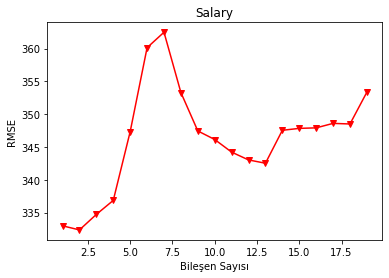

In [267]:
#CV
cv_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)


#Hata hesaplamak için döngü
RMSE = []

for i in np.arange(1, X_train.shape[1] + 1):
    pls = PLSRegression(n_components=i)
    score = np.sqrt(-1*cross_val_score(pls, X_train, y_train, cv=cv_10, scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

#Sonuçların Görselleştirilmesi
import matplotlib.pyplot as plt
plt.plot(np.arange(1, X_train.shape[1] + 1), np.array(RMSE), '-v', c = "r")
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Salary');

In [268]:
pls_model = PLSRegression(n_components = 2).fit(X_train, y_train)

In [269]:
y_pred = pls_model.predict(X_test)

In [270]:
np.sqrt(mean_squared_error(y_test, y_pred))
#PLSRegression(n_components=2) default değeri de 2 olduğundan aynı sonucu verdi

398.09956327448526

### 1.5. Ridge Regresyon
Temel amaç hata kareler toplamını minimize eden katsayıları bu katsayılara bir ceza uygulayarak bulmaktır.

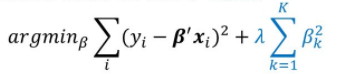

Aşırı öğrenmeye karşı dirençlidir.

Yanlıdır fakat varyansı düşüktür.

Çok boyutluluk lanetine çözüm sunar.

Çoklu Doğrusal bağlantı problemlerine karşı etkilidir.

Tüm değişkenlerle model kurar, ilgisiz değişkenleri modelden çıkarmaz, katsayılarını sıfıra yaklaştırır.

Lambda hata katsayısını ifade eder. Lambda için iyi bir değer bulunması önemlidir, bunun için cross validation kullanır.

#### 1.5.1. Model

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
hit = pd.read_csv("data/Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, ms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [9]:
from sklearn.linear_model import Ridge
#alpha=lambda
ridge_model = Ridge(alpha = 0.1).fit(X_train, y_train)
ridge_model

Ridge(alpha=0.1)

In [8]:
ridge_model.coef_

array([ -1.77435737,   8.80240528,   7.29595605,  -3.33257639,
        -2.08316481,   5.42531283,   7.58514945,  -0.13752764,
        -0.20779701,  -0.60361067,   1.7927957 ,   0.72866408,
        -0.68710375,   0.26153564,   0.26888652,  -0.52674278,
       112.14640272, -99.80997876, -48.07152768])

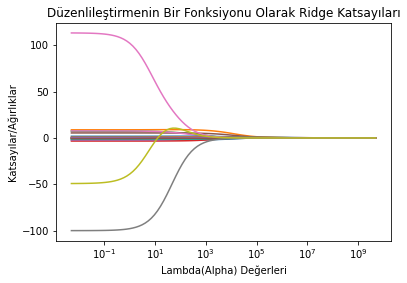

In [12]:
#belirlenen aralıkta lambda değerleri oluşturuyoruz
lambdalar = 10**np.linspace(10,-2,100)*0.5 

ridge_model = Ridge()
katsayilar = []

for i in lambdalar:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train, y_train) 
    katsayilar.append(ridge_model.coef_) 
    

import matplotlib.pyplot as plt    
ax = plt.gca()
ax.plot(lambdalar, katsayilar) 
ax.set_xscale('log') 

plt.xlabel('Lambda(Alpha) Değerleri')
plt.ylabel('Katsayılar/Ağırlıklar')
plt.title('Düzenlileştirmenin Bir Fonksiyonu Olarak Ridge Katsayıları');

#### 1.5.2. Tahmin

In [13]:
y_pred = ridge_model.predict(X_test)

In [15]:
from sklearn.metrics import mean_squared_error, r2_score
np.sqrt(mean_squared_error(y_test, y_pred))

357.05179222828315

#### 1.5.3. Model Tuning

In [16]:
lambdalar = 10**np.linspace(10,-2,100)*0.5 

In [17]:
lambdalar[0:5]

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09])

In [18]:
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(alphas = lambdalar, 
                   scoring = "neg_mean_squared_error",
                   normalize = True)

In [22]:
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        normalize=True, scoring='neg_mean_squared_error')

In [26]:
#optimum lambda değerini bulduk
ridge_cv.alpha_

0.7599555414764666

In [27]:
ridge_tuned = Ridge(alpha = ridge_cv.alpha_, 
                   normalize = True).fit(X_train,y_train)

In [28]:
np.sqrt(mean_squared_error(y_test, ridge_tuned.predict(X_test)))

386.6826429756415

### 1.6. Lasso Regresyon
Temel amaç hata kareler toplamını minimize eden katsayıları bu katsayılara bir ceza uygulayarak bulmaktır. Ridge regresyondan farkı, ceza sonucu katsayı değerlerinin sıfır olabilme ihtimalidir.

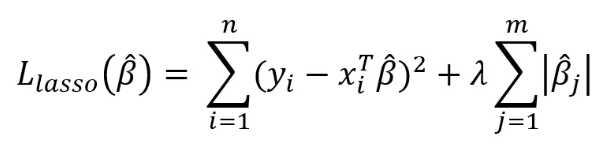

Ridge Regresyonun ilgili-ilgisiz tüm değişkenleri modelde bırakma dezavantajını gidermek için geliştirilmiştir.

Lambda hata katsayısını ifade eder. Lambda için iyi bir değer bulunması önemlidir, bunun için cross validation kullanır.

#### 1.6.1. Model

In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
hit = pd.read_csv("data/Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, ms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [55]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha = 0.1).fit(X_train, y_train)
lasso_model

Lasso(alpha=0.1)

In [56]:
lasso_model.coef_

array([-1.72206506e+00,  8.56210197e+00,  6.91175137e+00, -3.13240128e+00,
       -2.00771676e+00,  5.36159035e+00,  8.86871593e+00, -1.69520371e-01,
       -5.58121413e-02, -3.53962588e-01,  1.70961000e+00,  6.40603469e-01,
       -6.58519895e-01,  2.60093222e-01,  2.78717030e-01, -5.92690965e-01,
        1.12659630e+02, -9.99652090e+01, -4.81289395e+01])

Text(0, 0.5, 'weights')

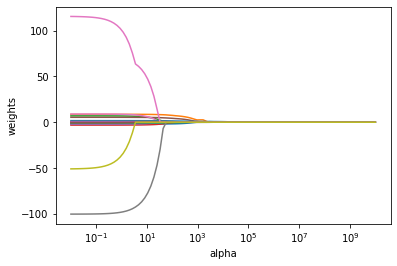

In [57]:
lasso = Lasso()
lambdalar = 10**np.linspace(10,-2,100)*0.5 
katsayilar = []

for i in lambdalar:
    lasso.set_params(alpha=i)
    lasso.fit(X_train, y_train)
    katsayilar.append(lasso.coef_)
  
import matplotlib.pyplot as plt  
ax = plt.gca()
ax.plot(lambdalar*2, katsayilar)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

#### 1.6.2. Tahmin 

In [58]:
lasso_model.predict(X_test)

array([ 613.88833029,  701.97056731, 1005.55539526,  414.08312603,
        399.18417127,  344.71444139,  664.86990217,  451.60757   ,
        914.64492066,  644.67006406,  691.60613554,  884.71702368,
        210.04523766,  446.12527252,  262.94922087,  499.22332142,
        805.2275034 ,   43.49230343, 1250.49322312,  316.34470193,
        422.96656686,  743.29944548,  572.90774248,  655.15609074,
        618.96407069,  200.75845796,  882.64622066,  254.06366112,
        430.25494812,   84.17391461,  143.60312305,  130.61554   ,
        363.74498233,  461.7321162 ,  273.42345417,  244.49816262,
       1324.62748553,  107.89909718,  135.63065031,  242.72630885,
         51.70024086,  297.57598929,  586.86143037,  398.85227639,
        763.99543074,  690.10003532,  344.06272851,  247.43966241,
        255.13234043,  662.89091837,  765.66189   ,  313.57347726,
        765.84996179,  189.77235179,  283.98765436,  589.95238974,
        663.31166365,  803.29524626,  164.99767232, 1170.24294

In [59]:
y_pred = lasso_model.predict(X_test)

In [60]:
np.sqrt(mean_squared_error(y_test, y_pred))

356.75452701487694

#### 1.6.3. Model Tuning

In [61]:
from sklearn.linear_model import LassoCV

In [62]:
lasso_cv_model = LassoCV(alphas = None, 
                         cv = 10, 
                         max_iter = 10000, 
                         normalize = True)

In [63]:
lasso_cv_model.fit(X_train,y_train)

LassoCV(cv=10, max_iter=10000, normalize=True)

In [64]:
lasso_cv_model.alpha_

0.3940612643247009

In [65]:
lasso_tuned = Lasso(alpha = lasso_cv_model.alpha_)

In [66]:
lasso_tuned.fit(X_train, y_train)

Lasso(alpha=0.3940612643247009)

In [67]:
y_pred = lasso_tuned.predict(X_test)

In [68]:
np.sqrt(mean_squared_error(y_test, y_pred))

356.5226376958368

### 1.7. ElasticNet (eNet) Regresyonu
Temel amaç hata kareler toplamını minimize eden katsayıları bu katsayılara bir ceza uygulayarak bulmaktır. ElasticNet L1 ve L2 yaklaşımlarını birleştirir.

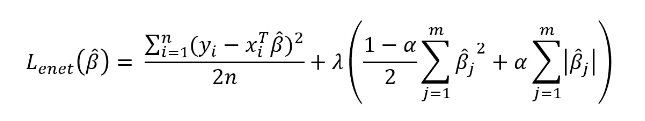



#### 1.7.1. Model

In [69]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
hit = pd.read_csv("data/Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, ms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)




In [70]:
from sklearn.linear_model import ElasticNet
enet_model = ElasticNet().fit(X_train, y_train)
enet_model.coef_

array([ -1.86256172,   8.70489065,   5.10426375,  -2.89875799,
        -1.28642985,   5.24343682,   6.04480276,  -0.14701495,
        -0.21566628,  -0.7897201 ,   1.80813117,   0.80914508,
        -0.61262382,   0.26816203,   0.27172387,  -0.36530729,
        19.2186222 , -31.16586592,   8.98369938])

In [71]:
enet_model.intercept_

-6.465955602112331

#### 1.7.2. Tahmin

In [72]:
enet_model

ElasticNet()

In [73]:
enet_model.predict(X_test)

array([ 577.79111731,  617.33202224, 1031.39113156,  364.95861575,
        489.51894393,  300.74185842,  604.522666  ,  465.34678732,
        901.44473965,  703.20357123,  702.9157117 ,  931.50283407,
        184.87939803,  385.14973787,  325.38944176,  546.99346574,
        774.28001821,  101.83114992, 1250.86758812,  370.67651244,
        442.05734523,  781.17288513,  578.63736538,  609.31927808,
        608.31719597,  227.46556223,  921.85505228,  301.1202457 ,
        386.31721051,  133.61143326,  162.28505608,   88.29793182,
        359.9068418 ,  422.51268445,  265.8663769 ,  355.70450908,
       1329.36312363,  125.05506935,   82.74580002,  269.17483075,
        117.13319397,  274.13484779,  648.4957249 ,  409.47065999,
        846.27919406,  712.04817644,  341.10596674,  368.24259678,
        305.70477656,  680.05724792,  716.13640636,  295.93204262,
        773.06445823,  249.28224916,  221.46794589,  541.2713245 ,
        611.50212372,  770.80228024,  168.45143906, 1159.05660

In [74]:
y_pred = enet_model.predict(X_test)

In [75]:
np.sqrt(mean_squared_error(y_test, y_pred))

357.1676548181245

In [76]:
r2_score(y_test, y_pred)

0.4107022246932689

#### 1.7.3. Model Tuning

In [77]:
from sklearn.linear_model import ElasticNetCV

In [78]:
enet_cv_model = ElasticNetCV(cv = 10, random_state = 0).fit(X_train, y_train)

In [79]:
enet_cv_model.alpha_

5230.7647364798695

In [80]:
enet_cv_model

ElasticNetCV(cv=10, random_state=0)

In [81]:
enet_tuned = ElasticNet(alpha = enet_cv_model.alpha_).fit(X_train,y_train)

In [82]:
y_pred = enet_tuned.predict(X_test)

In [83]:
np.sqrt(mean_squared_error(y_test, y_pred))

394.1528056321879

**Not:** elimizdeki bu veriseti için en iyi çalışan model Lasso modeli gibi görünmektedir.